In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Get information about the dataset
print(heart_disease.info())

# Summary statistics
print(heart_disease.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

In [4]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
print(heart_disease.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


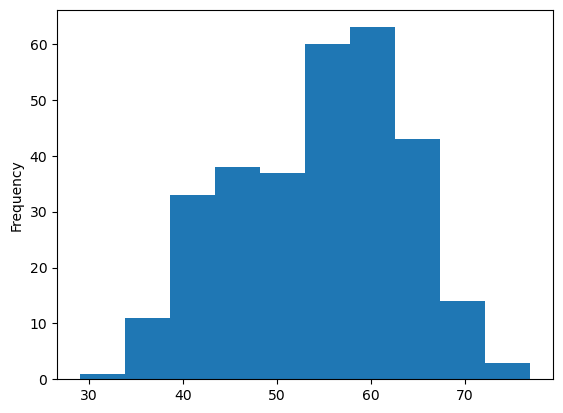

In [6]:
# Create a histrogram of age
heart_disease["age"].plot.hist();

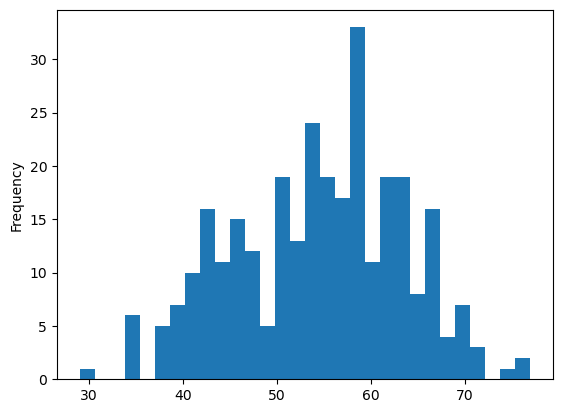

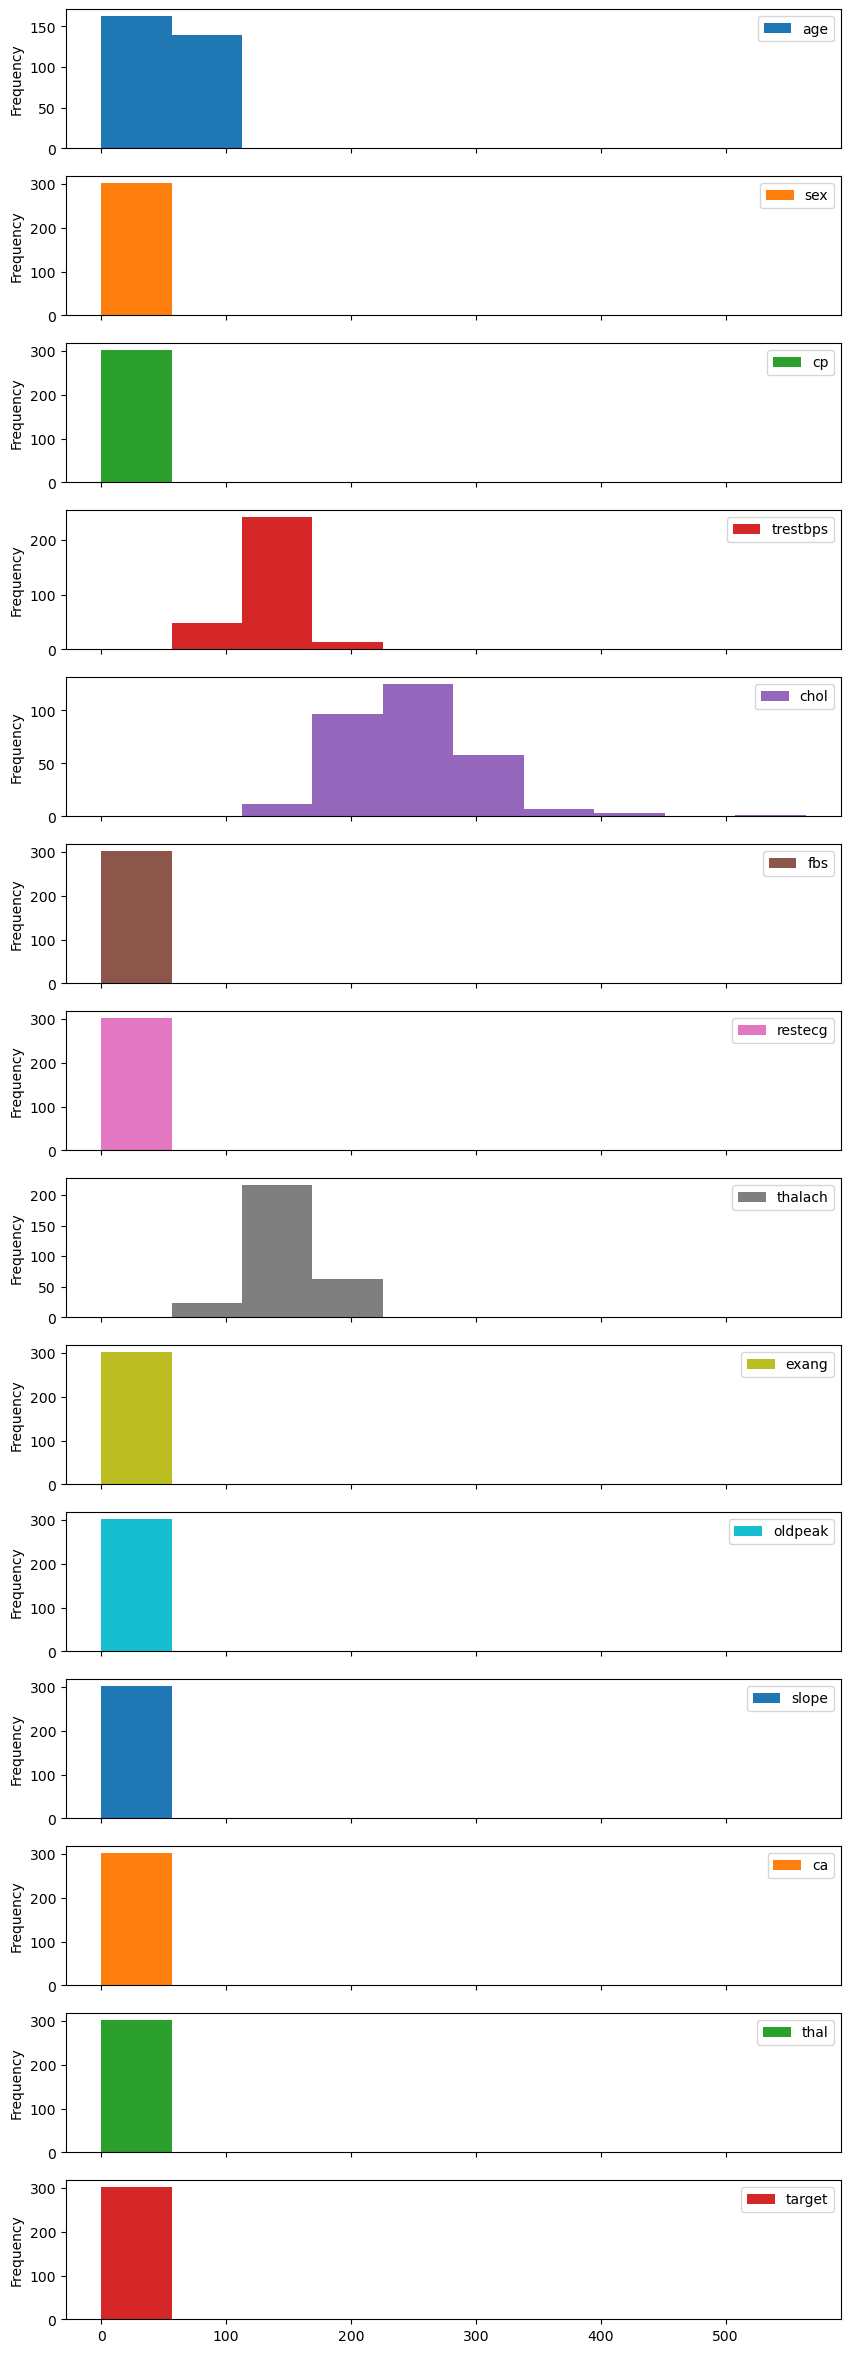

In [7]:
heart_disease["age"].plot.hist(bins=30);
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

In [8]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [9]:


over_50 = heart_disease[heart_disease["age"] > 50]
len(over_50)

208

In [10]:
over_50.target.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<Axes: xlabel='age', ylabel='chol'>

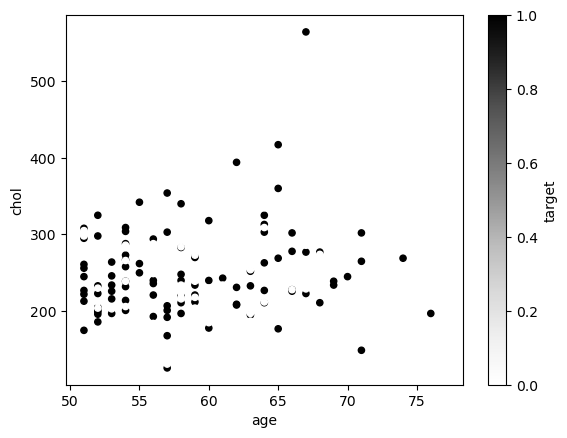

In [11]:
over_50.plot(kind='scatter',
                x="age",
                y="chol",
                c="target")

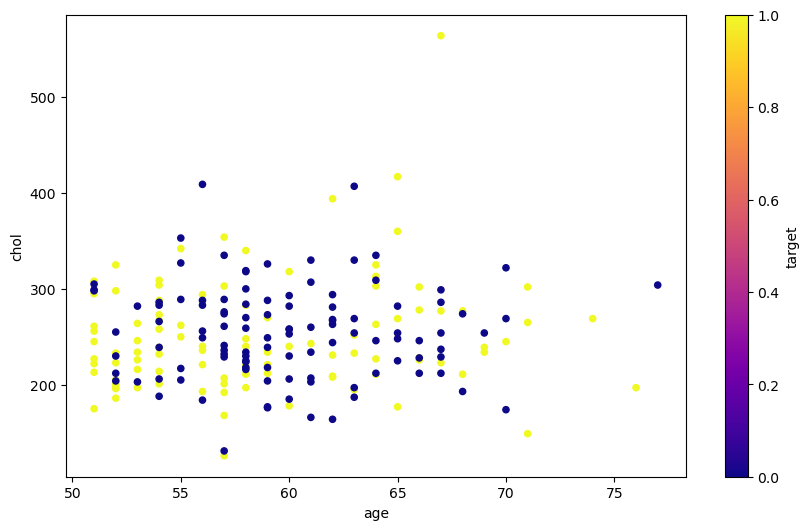

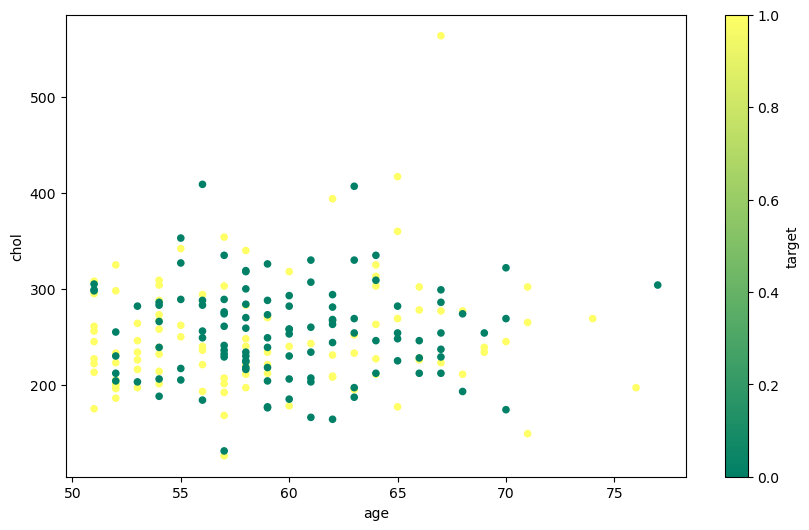

In [12]:
# oo Method
fix, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
                x="age",
                y="chol",
                c="target",
                cmap="plasma",
                ax=ax);
#  ax.set_xlim([45, 100]);

# oo Method
fix, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
                x="age",
                y="chol",
                c="target",
                cmap="summer",
                ax=ax);
#  ax.set_xlim([45, 100]);

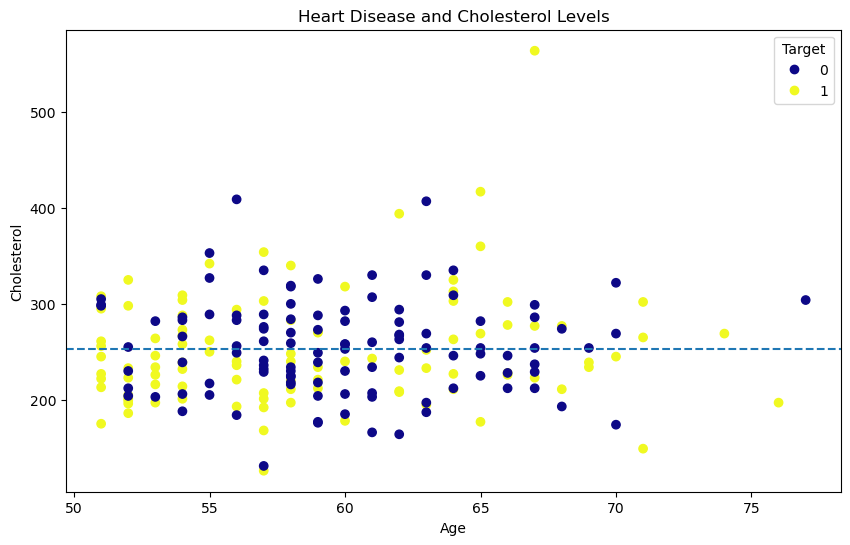

In [13]:
## oo Method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap='plasma');

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
            linestyle="--");

This plot show some information about the heart disease dataset...

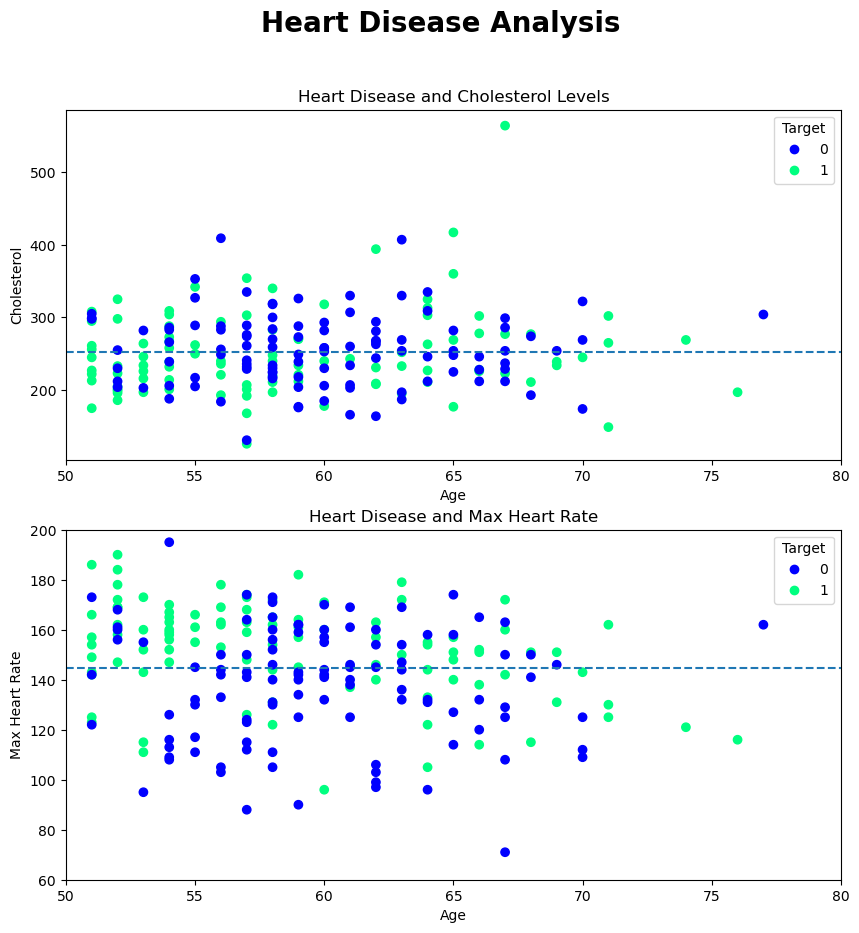

In [14]:
# Subplot of chol, age, thalash 
fig, (ax0, ax1) = plt.subplots(nrows=2,
                       ncols=1,
                       figsize=(10, 10))
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                       cmap='winter')    
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
         xlabel="Age",  
         ylabel="Cholesterol")
# Change  the X axis limits
ax0.set_xlim([50, 80])
# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")
# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                      cmap='winter')
# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
         xlabel="Age",
         ylabel="Max Heart Rate")
# Change ax1 X axis limits
ax1.set_xlim([50, 80])
ax1.set_ylim([60, 200])
# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")
# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=20, fontweight="bold");

In [15]:
# Example: Selecting features based on correlation
corr_matrix = heart_disease.corr()
high_corr = corr_matrix['target'].abs().sort_values(ascending=False)
print(high_corr)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [16]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["chol", "age"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["thal",
             "cp",
             "restecg",
             "slope",
             "target"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["fbs"] = le.fit_transform(data["fbs"])
    data["ca"] = le.fit_transform(data["ca"])
    data["oldpeak"] = le.fit_transform(data["oldpeak"])
    
    # drop this column
    data = data.drop(["trestbps"], axis=1)
    data = data.drop(["exang"], axis=1)
    data = data.drop(["oldpeak"], axis=1)
    data = data.drop(["ca"], axis=1)
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data

In [17]:
#  Prepare the data: Split into features (X) and target (y)
X = heart_disease.drop('target', axis=1)  # Features
y = heart_disease['target']  # Target

In [18]:
# 2Train/test split: Divide the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#  Feature scaling: Scaling the features to standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Model selection:Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)  # Train the model

LogisticRegression(random_state=42)

In [21]:
#  Model prediction
y_pred = logistic_model.predict(X_test_scaled)

In [22]:
#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [23]:
# Output the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [24]:
# Get the predicted result for the test Data
heart_disease.target = logistic_model.predict

In [25]:
# Create submission DataFrame
submission = pd.DataFrame({"oldpeak": heart_disease["oldpeak"] + " x " + heart_disease["sex"],
                           "oldpeak": heart_disease.oldpeak})

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U3')) -> None